##                                              EMAIL SPAM DETECTION

This is the dataset in which some randomly mails are collected and classified as spam or ham .1st column contains spam/ham classification resr column have the mail itself

OBJECTIVE

The objective of email spam detection using machine learning is to accurately and efficiently identify and block unsolicited and unwanted emails that are sent in bulk to a large number of recipients. Machine learning algorithms can analyze large amounts of data and learn from past patterns to improve their accuracy over time. The goal is to protect users from phishing attacks, malware distribution, and other fraudulent activities by detecting and blocking spam emails. By using machine learning for email spam detection, email providers can ensure that their users have a safe and secure email experience.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/spam.csv', encoding= 'latin_1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**EXPLORATARY DATA ANALYSIS**

Exploratory data analysis (EDA) is an approach to analyzing and summarizing data in order to gain insights and understanding of the underlying patterns, relationships, and trends. EDA involves using various statistical and visualization techniques to explore the data, identify outliers, detect missing values, and understand the distribution and structure of the data. The goal of EDA is to generate hypotheses about the data that can be further tested and refined using more advanced statistical techniques. EDA is often used as a preliminary step in data analysis to gain a better understanding of the data before performing more advanced analyses.

In [4]:
df.shape

(5572, 5)

In [5]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)


In [7]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
df.isna().sum()

v1    0
v2    0
dtype: int64

In [9]:
df.shape

(5572, 2)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


TO CHECK DUPLICATES

In [11]:
df.duplicated().sum()

403

In [12]:
dup = df.duplicated()

In [13]:
dup = pd.DataFrame(dup)

In [14]:
dup['label'] = dup[0]
dup

,0,label
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5567,False,False
5568,False,False
5569,False,False
5570,False,False


In [15]:
dup.value_counts()


0      label
False  False    5169
True   True      403
dtype: int64

In [16]:
# to print duplicate values
Dup = dup.loc[dup['label'] == True]
Dup

,0,label
102,True,True
153,True,True
206,True,True
222,True,True
325,True,True
...,...,...
5524,True,True
5535,True,True
5539,True,True
5553,True,True


In [17]:
#remove duplicate records
Df = df.drop_duplicates()

In [18]:
# to check data shape after remove duplicate records
Df.shape

(5169, 2)

In [19]:
Df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


 **FEATURE ENGINEERING**

 Feature engineering is the process of selecting, transforming, and creating new features from raw data to improve the performance of machine learning models. It involves identifying relevant variables, selecting appropriate techniques to transform them, and creating new features that capture important information from the data. Feature engineering can include methods such as scaling, normalization, one-hot encoding, dimensionality reduction, and feature extraction. The goal of feature engineering is to create a set of features that can accurately represent the underlying patterns and relationships in the data and improve the predictive power of machine learning models.

[Text(0.5, 1.0, 'A countplot of spam␣and ham categories')]

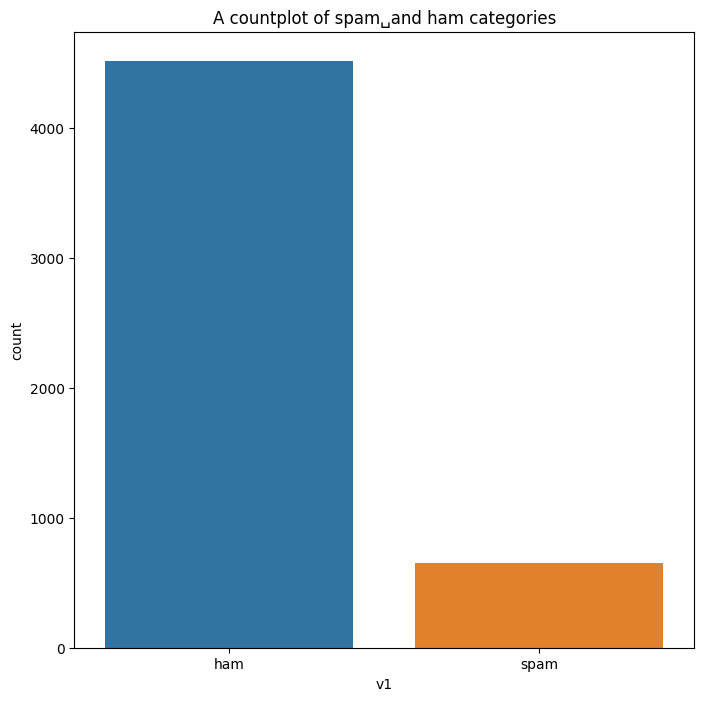

In [20]:
plt.figure(figsize=(8,8))
sns.countplot(x = 'v1', data = Df).set(title = 'A countplot of spam␣and ham categories')

In [21]:
#Rename the columns in given dataset like v1: label, v2:text
Df.rename(columns={'v1':'label','v2':'text'},inplace=True)

In [ ]:
Df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [28]:
Df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [30]:
Df.label = Df.label.map({"ham":0, "spam":1})
Df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


**MODEL SELECTION**

Model selection is the process of choosing the best machine learning algorithm or model for a given task or problem. It involves evaluating and comparing different models based on their performance metrics such as accuracy, precision, recall, and F1 score. Model selection can also involve tuning hyperparameters of the models to improve their performance. The goal of model selection is to select the most appropriate model that can accurately predict outcomes on new data. It is an important step in the machine learning pipeline as it can significantly impact the performance and generalization ability of the model.

In [34]:
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(Df.text,
                                                                            Df.label,
                                                                            test_size=0.2)

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

couvec = CountVectorizer()
couvec.fit(features_train)

CountVectorizer()

In [37]:
dtm_train = couvec.fit_transform(features_train)
print("Shape of dtm_train:", dtm_train.shape)
print(dtm_train[0:2]) # first two rows of sparse matrix

Shape of dtm_train: (4135, 7622)
  (0, 3259)	1
  (0, 1529)	1
  (0, 6929)	1
  (0, 3445)	1
  (0, 4558)	2
  (0, 7570)	3
  (0, 6023)	1
  (0, 908)	1
  (0, 2665)	1
  (0, 7575)	1
  (0, 4157)	1
  (0, 6812)	1
  (0, 6191)	1
  (0, 6691)	1
  (0, 3683)	1
  (0, 7386)	1
  (0, 3481)	1
  (0, 7350)	1
  (0, 6720)	1
  (0, 3990)	1
  (0, 4893)	1
  (0, 3053)	1
  (0, 5917)	1
  (0, 7615)	1
  (0, 6992)	1
  (0, 2600)	1
  (1, 7570)	2
  (1, 7575)	1
  (1, 7350)	1
  (1, 2353)	1
  (1, 3281)	1
  (1, 951)	1
  (1, 4808)	1
  (1, 2777)	1
  (1, 3565)	3
  (1, 4590)	2
  (1, 1163)	1
  (1, 7261)	1
  (1, 7456)	1
  (1, 1569)	1
  (1, 4333)	1
  (1, 4091)	1
  (1, 6639)	1
  (1, 3524)	1
  (1, 2793)	1
  (1, 960)	1
  (1, 5725)	1


In [38]:
dtm_test = couvec.transform(features_test)
print("Shape of dtm_test:", dtm_test.shape)

Shape of dtm_test: (1034, 7622)


In [39]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [40]:
nb.fit(dtm_train, labels_train)

MultinomialNB()

In [41]:
labels_pred = nb.predict(dtm_test)

In [42]:
from sklearn import metrics
metrics.accuracy_score(labels_test, labels_pred)

0.9874274661508704

In [43]:
# Percentagem do total de spams detectados i.e.recall
print("Recall:", metrics.recall_score(labels_test, labels_pred))

# Percentagem das predições positivas (spams) corretas, i.e. precisão
print("Precisão:", metrics.precision_score(labels_test, labels_pred))

Recall: 0.9230769230769231
Precisão: 0.975609756097561


In [44]:
print("Ordem das classes no predict_proba:", nb.classes_)
print("Exemplos de probabilidades de classes:", nb.predict_proba(dtm_test)[0])

Ordem das classes no predict_proba: [0 1]
Exemplos de probabilidades de classes: [9.99999099e-01 9.00932230e-07]


In [45]:
labels_prob = nb.predict_proba(dtm_test)[:, 1]
precisions, recalls, thresholds = metrics.precision_recall_curve(labels_test, labels_prob)

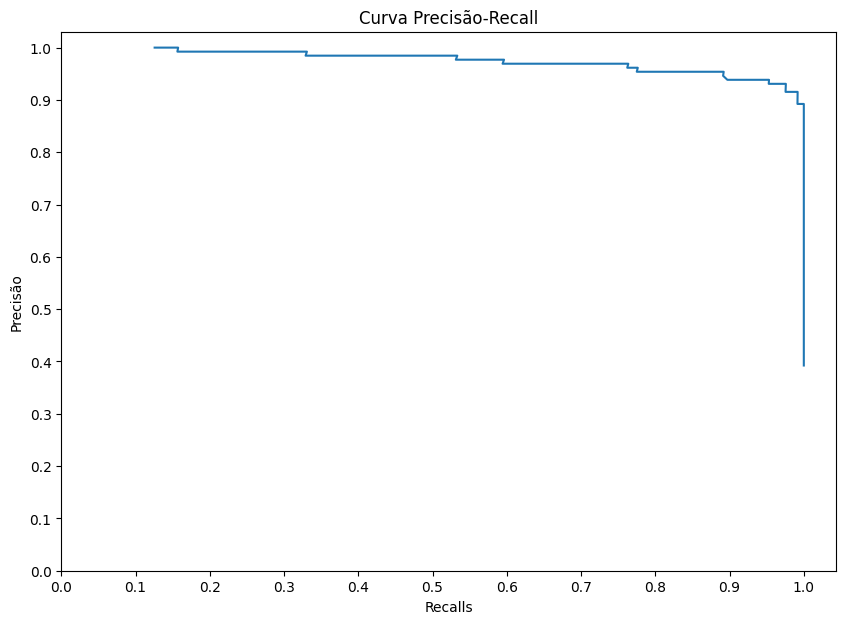

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.plot(precisions[:-1], recalls[:-1])
plt.xlabel("Recalls")
plt.xticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Precisão")
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title("Curva Precisão-Recall")
plt.show()

In [ ]:
#label encoding for target column label[i.e - ham : 0, spam : 1]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Df['label'] = le.fit_transform(Df['label'])

In [ ]:
x = Df['text']
y = Df['label']

In [ ]:
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5169, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
x = np.array(x, dtype=str)
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
x = feature_extraction.fit_transform(x)

In [ ]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

In [ ]:
x_train

<3618x8404 sparse matrix of type '<class 'numpy.float64'>'
	with 27646 stored elements in Compressed Sparse Row format>

BALANCE THE DATA

The Given data is imbalance. so we use over_sampling method

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state = 0)
x_train1, y_train1 = ros.fit_resample(x_train,y_train)

<Axes: xlabel='label', ylabel='count'>

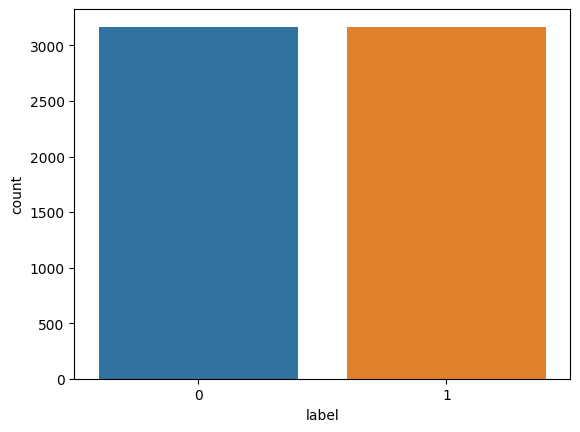

In [ ]:
sns.countplot(x = y_train1)

MODEL BUILDINGS

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#Using Logistic Regression
lr = LogisticRegression()
lr.fit(x_train1,y_train1)

LogisticRegression()

In [ ]:
lr_pred = lr.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [ ]:
print('Confusion matrix: ', '\n', confusion_matrix(lr_pred,y_test))
print('Accuracy score: ', accuracy_score(lr_pred,y_test))
print(classification_report(lr_pred,y_test))

Confusion matrix:  
 [[1338   33]
 [  10  170]]
Accuracy score:  0.9722759509993553
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1371
           1       0.84      0.94      0.89       180

    accuracy                           0.97      1551
   macro avg       0.92      0.96      0.94      1551
weighted avg       0.97      0.97      0.97      1551



In [ ]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(x_train1, y_train1)

SVC()

In [ ]:
sv_pred = sv.predict(x_test)

In [ ]:
print('Confusion matrix: ', '\n', confusion_matrix(sv_pred,y_test))
print('Accuracy score: ', accuracy_score(sv_pred,y_test))
print(classification_report(sv_pred,y_test))

Confusion matrix:  
 [[1347   61]
 [   1  142]]
Accuracy score:  0.9600257898130239
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1408
           1       0.70      0.99      0.82       143

    accuracy                           0.96      1551
   macro avg       0.85      0.97      0.90      1551
weighted avg       0.97      0.96      0.96      1551



RANDOM FOREST MODEL

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train1, y_train1)

RandomForestClassifier()

In [ ]:
rf_pred = rf.predict(x_test)


In [ ]:
print('Confusion matrix: ', '\n', confusion_matrix(rf_pred,y_test))
print('Accuracy score: ', accuracy_score(rf_pred,y_test))
print(classification_report(rf_pred,y_test))

Confusion matrix:  
 [[1346   45]
 [   2  158]]
Accuracy score:  0.9696969696969697
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1391
           1       0.78      0.99      0.87       160

    accuracy                           0.97      1551
   macro avg       0.89      0.98      0.93      1551
weighted avg       0.98      0.97      0.97      1551



DECISION TREE MODEL

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy',max_depth =  15,min_samples_leaf = 1,min_samples_split= 4)
dt.fit(x_train1,y_train1)

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_split=4)

In [ ]:
dt_pred = dt.predict(x_test)


In [ ]:
print('Confusion matrix: ', '\n', confusion_matrix(dt_pred,y_test))
print('Accuracy score: ', accuracy_score(dt_pred,y_test))
print(classification_report(dt_pred,y_test))

Confusion matrix:  
 [[1331   56]
 [  17  147]]
Accuracy score:  0.9529335912314636
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1387
           1       0.72      0.90      0.80       164

    accuracy                           0.95      1551
   macro avg       0.86      0.93      0.89      1551
weighted avg       0.96      0.95      0.96      1551



Using the above models to predict some message.

For the prediction, 0 represents not spam and 1 represents spam.

In [ ]:
msg = ['Better. Made up for Friday and stuffed myself like a pig yesterday. Now I feel bleh. But, at least, its not writhing pain kind of bleh.']
msg = feature_extraction.transform(msg)

In [ ]:
lr.predict(msg)

array([0])

In [ ]:
rf.predict(msg)

array([0])

In [ ]:
sv.predict(msg)

array([0])

So,the given above msg, all models have been able to tell that the message is not spam msg

In [ ]:
msg1 = ['Congratulations ur awarded 500 of CD vouchers or 125 gift guaranteed & Free entry 2 100 wkly draw txt MUSIC to 87066.']
msg1 = feature_extraction.transform(msg1)

In [ ]:
lr.predict(msg1)

array([1])

In [ ]:
rf.predict(msg1)

array([1])

In [ ]:
dt.predict(msg1)

array([1])

CONCLUSION

The above messages all models have been able to tell that the message is spam